In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [2]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

In [3]:
ZRI = pd.read_csv('./data/Zip_Zri_MultiFamilyResidenceRental.csv', index_col=0,dtype={'RegionName': 'str'})

In [4]:
ZRI.shape

(1861, 119)

In [5]:
#melt zri dataframe
ZRI_f = pd.melt(ZRI, id_vars =['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], value_vars=ZRI.iloc[:,6:119])


In [6]:
ZRI_f[ZRI_f.value == 0]

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value


In [7]:
ZRI_f.columns[ZRI_f.isnull().any()]

Index(['Metro', 'value'], dtype='object')

Text(0.5, 1.0, 'ZRI Distribution')

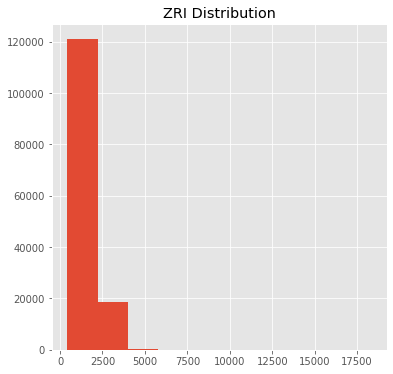

In [8]:
plt.figure(figsize=(6,6))
ZRI_f['value'].hist()
plt.title('ZRI Distribution')

In [9]:
print('Rent Mean: ', np.mean(ZRI_f.value))
print('Rent Median: ', (ZRI_f.value).median())

upper_lim = np.mean(ZRI_f.value) + 3 * np.std(ZRI_f.value)
lower_lim = np.mean(ZRI_f.value) - 3 * np.std(ZRI_f.value)
print('Outliers are above %.2f and below %.2f' % (upper_lim, lower_lim))

Rent Mean:  1518.0649123433427
Rent Median:  1395.0
Outliers are above 3436.70 and below -400.57


Text(0.5, 1.0, 'Log Rent Distribution')

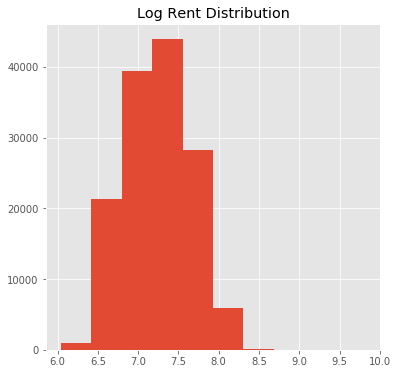

In [10]:
ZRI_f['LogValue'] = np.log(ZRI_f.value)
plt.figure(figsize=(6,6))
ZRI_f['LogValue'].hist()
plt.title('Log Rent Distribution')

In [11]:
print('Log Rent Mean: %.1f' % np.mean(ZRI_f['LogValue']))

upper_lim = np.mean(ZRI_f['LogValue']) + 3.5 * np.std(ZRI_f['LogValue'])
lower_lim = np.mean(ZRI_f['LogValue']) - 3.5 * np.std(ZRI_f['LogValue'])
print('Outliers are above %.1f and below %.1f' % (upper_lim, lower_lim))

Log Rent Mean: 7.2
Outliers are above 8.7 and below 5.8


In [12]:
ZRI_f[ZRI_f.LogValue > 8.7].sort_values('LogValue', ascending=False)

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue
181886,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2018-10,18349.0,9.817330
200496,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2019-08,17943.0,9.794955
161415,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2017-11,15445.0,9.645041
168859,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2018-03,13434.0,9.505544
170720,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2018-04,13427.0,9.505023


In [13]:
ZRI_f[ZRI_f.LogValue < 5.8].sort_values('LogValue', ascending=False)

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue


In [14]:
#remove outliers
ZRI_f = ZRI_f[(ZRI_f.LogValue < 8.7)]

In [15]:
#remove outliers
ZRI_f = ZRI_f[(ZRI_f.value < 3436.70)]

In [16]:
ZRI_f[ZRI_f.LogValue > 8.7].sort_values('LogValue', ascending=False)

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue


Text(0.5, 1.0, 'Log Rent Distribution Outliers Removed')

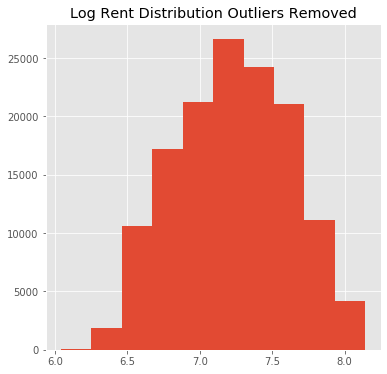

In [17]:
ZRI_f['LogValue'] = np.log(ZRI_f.value)
plt.figure(figsize=(6,6))
ZRI_f['LogValue'].hist()
plt.title('Log Rent Distribution Outliers Removed')

Text(0.5, 1.0, 'Rent Distribution')

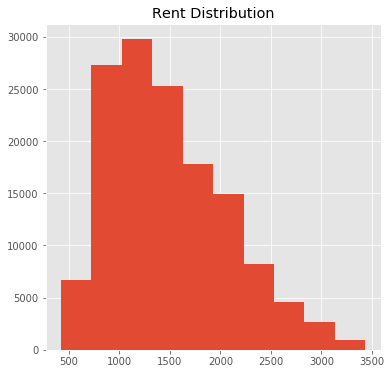

In [18]:
plt.figure(figsize=(6,6))
ZRI_f['value'].hist()
plt.title('Rent Distribution')

In [19]:
ZRI_f.head()

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2010-09,2930.0,7.982758
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2010-09,1447.0,7.277248
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2010-09,2797.0,7.936303
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2010-09,1437.0,7.270313
8,79936,El Paso,TX,El Paso,El Paso County,9,2010-09,982.0,6.889591


In [20]:
ZRI_f['variable'] = pd.to_datetime(ZRI_f['variable'])
ZRI_f['Month'] = ZRI_f['variable'].dt.month
ZRI_f['Year'] = ZRI_f['variable'].dt.year

In [21]:
ZRI_f.head()

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue,Month,Year
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2010-09-01,2930.0,7.982758,9,2010
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2010-09-01,1447.0,7.277248,9,2010
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2010-09-01,2797.0,7.936303,9,2010
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2010-09-01,1437.0,7.270313,9,2010
8,79936,El Paso,TX,El Paso,El Paso County,9,2010-09-01,982.0,6.889591,9,2010


Text(0.5, 1.0, 'Avg Yearly Rent')

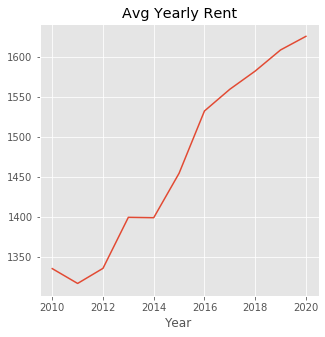

In [22]:
plt.figure(figsize=(5,5))
ZRI_f.groupby('Year').agg({'value':'mean'})['value'].plot()
plt.title('Avg Yearly Rent')

Text(0.5, 1.0, 'Avg Yearly Rent')

<Figure size 360x360 with 0 Axes>

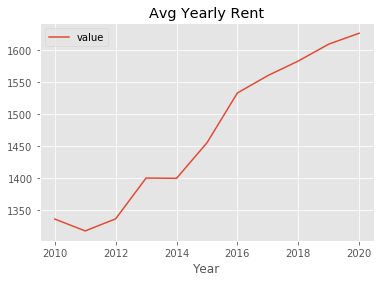

In [23]:
plt.figure(figsize=(5,5))
ZRI_f.groupby('Year').agg({'value':'mean'}).plot()
plt.title('Avg Yearly Rent')

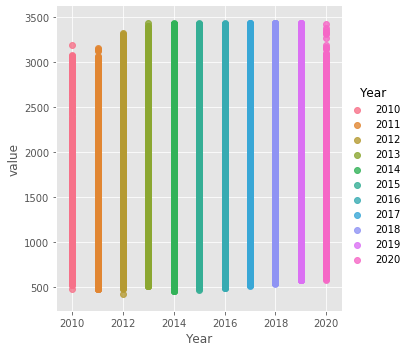

In [24]:
sns.lmplot("Year", "value", ZRI_f, hue="Year")

Text(0.5, 1.0, 'Avg Monthly Rent')

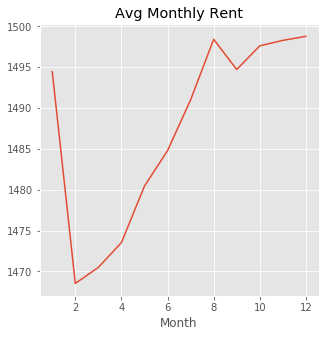

In [25]:
plt.figure(figsize=(5,5))
ZRI_f.groupby('Month').agg({'value':'mean'})['value'].plot()
plt.title('Avg Monthly Rent')

In [26]:
#Add season feature 

def month_to_season(month):
    if month in range(3,5):
        month = 'spring'
    elif month in range(6,8):
        month = 'summer'
    elif month in range(9,11):
        month = 'fall'
    else:
        month = 'winter'
    return(month)

ZRI_f['Season'] = ZRI_f.Month.apply(month_to_season)

In [27]:
ZRI_f.head()

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue,Month,Year,Season
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2010-09-01,2930.0,7.982758,9,2010,fall
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2010-09-01,1447.0,7.277248,9,2010,fall
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2010-09-01,2797.0,7.936303,9,2010,fall
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2010-09-01,1437.0,7.270313,9,2010,fall
8,79936,El Paso,TX,El Paso,El Paso County,9,2010-09-01,982.0,6.889591,9,2010,fall


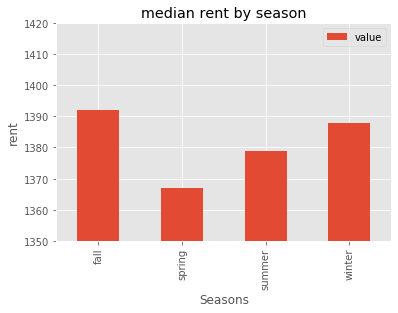

In [28]:
season_rent = ZRI_f.groupby(['Season']).agg({"value": 'median'})

season_rent.plot.bar()
plt.title('median rent by season')
plt.xlabel('Seasons')
plt.ylabel('rent')
plt.ylim(1350,1420)
plt.show()

In [29]:
# calling in other dataframes to get features

zri = pd.read_csv('./data/df3.csv', index_col=0)




In [30]:
zri.head()

,ZIPCODE,City,State,Metro,CountyName,SizeRank,Year-Month,value,Month,Year,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,FIPSCode,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,geo_id,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,housing_units_renter_occupied,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,rental_units_supply,year,population_change,income_change,supply_change,natural_amenity_rank
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2010-09-01,2930.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,36061.0,NaN,NaN,NaN,8.6,1.3,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2010-09-01,1447.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,17031.0,NaN,NaN,NaN,10.9,3.7,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2010-09-01,2797.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,36061.0,NaN,NaN,NaN,8.6,1.3,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2010-09-01,1437.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,17031.0,NaN,NaN,NaN,10.9,3.7,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79936,El Paso,TX,El Paso,El Paso County,9,2010-09-01,982.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,48141.0,NaN,NaN,NaN,9.2,5.9,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
zri['MortDeliq30-89'] = zri['MortDeliq30-89'].fillna(zri['MortDeliq30-89'].mean())
zri['MortDeliq90'] = zri['MortDeliq90'].fillna(zri['MortDeliq90'].mean())
zri['education'] = zri['high_school_diploma'] + zri['associates_degree'] * 2 + zri['bachelors_degree'] * 3 +zri['masters_degree']* 4

In [32]:
zri['AGIncome'] = (zri['AGIncome']*1000)/zri['total_pop']
zri['TotIncome'] = (zri['TotIncome']*1000)/zri['total_pop']
zri['SalariesWages'] = (zri['SalariesWages']*1000)/zri['total_pop']
zri['NumUnemply'] =(zri['NumUnemply']*1000)/zri['total_pop']
zri['TotTaxes'] = (zri['TotTaxes']*1000)/zri['total_pop']

In [33]:
zri.income_change = zri.income_change.fillna(0)

In [34]:
# #Log Transformation:
zri['LogValue'] = np.log(zri.value)
zri['LogTotTaxes'] = np.log(zri.TotTaxes)
zri['Logincome_per_capita'] = np.log(zri.income_per_capita)

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
train = pd.merge(zri.loc[zri['Year']==2015].rename(columns = {'LogValue' : 'LogValue_2015'}),
                 zri.loc[zri['Year']==2018][['ZIPCODE', 'Month','LogValue']],
                 how = 'left', on = ['ZIPCODE', 'Month'])
test = pd.merge(zri.loc[zri['Year']==2016].rename(columns = {'LogValue' : 'LogValue_2016'}),
                zri.loc[zri['Year']==2019][['ZIPCODE', 'Month','LogValue']],
                how = 'left', on = ['ZIPCODE', 'Month'])

In [36]:
#drop columns to test

dropped = ['SizeRank', 'City', 'State', 'Metro', 'CountyName',\
        'Month','Year','Labor\nForce','Employed', 'Unemployed',\
        'Year-Month', 'FIPSCode', 'geo_id',\
        'year'] #'ZIPCODE'

train.drop(columns = dropped, inplace=True)
test.drop(columns = dropped, inplace=True)

In [37]:
train = train.dropna(subset=['LogValue'])
test = test.dropna(subset=['LogValue'])

In [38]:
X_train = train.drop(columns = ['LogValue'])
y_train = train['LogValue']
X_test = test.drop(columns = ['LogValue'])
y_test = test['LogValue']

In [39]:
from sklearn.linear_model import LinearRegression
continuous_features = ['LogValue_2015', 'Season', 'LogTotTaxes',
       'MortDeliq90', 'gini_index',
       'black_pop', 'asian_pop', 'white_pop',
       'vacant_housing_units_for_rent', 
       'natural_amenity_rank']
scores = {}
ols4 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                df2     = train.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols4.fit(df2, feature)
                scores[feature_name] = ols4.score(df2, feature)  

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [40]:
sns.barplot(x='R2', y='index', data=pd.DataFrame(scores, index=['R2'])\
            .T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')

ValueError: min() arg is an empty sequence

Text(0.5, 1.0, 'Feature Importance to ZRI')

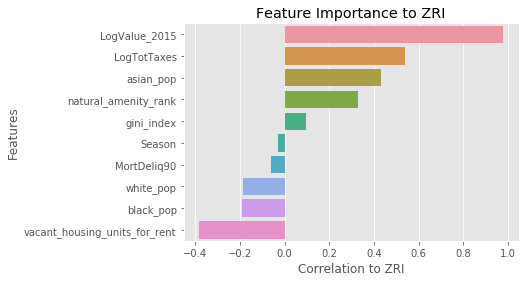

In [41]:
features = ['LogValue_2015', 'Season', 'LogTotTaxes',
       'MortDeliq90', 'gini_index',
       'black_pop', 'asian_pop', 'white_pop',
       'vacant_housing_units_for_rent', 
       'natural_amenity_rank']
corr = train[['value'] + features].corr()

corr = corr.sort_values('value', ascending=False)
sns.barplot( corr.value[1:], corr.index[1:], orient='h')
plt.xlabel("Correlation to ZRI")
plt.ylabel("Features")
plt.title("Feature Importance to ZRI")

In [ ]:
features = ['LogValue_2015', 'Season', 'NumUnemply', 'LogTotTaxes',
       'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89', 'MortDeliq90',
       'total_pop', 'median_age', 'white_pop', 'black_pop', 'asian_pop',
       'hispanic_pop', 'gini_index', 'Logincome_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'population_change', 'income_change', 'natural_amenity_rank',
       'education']
corr = train[['value'] + features].corr()

corr = corr.sort_values('value', ascending=False)
sns.barplot( corr.value[1:], corr.index[1:], orient='h')
plt.xlabel("Correlation to ZRI")
plt.ylabel("Features")
plt.title("Feature Importance to ZRI")

In [ ]:
#create a single data frame with both features and target by concatonating
train_df=pd.concat([X_train, y_train], axis=1)
train_df.head()

In [ ]:
p = sns.pairplot(zri, x_vars=['total_pop', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'population_change', 'natural_amenity_rank',
                             'education'], y_vars='value', height=7, aspect=0.7)

In [ ]:
p = sns.pairplot(zri, x_vars=['TotTaxes',
                             'LogTotTaxes'], y_vars='LogValue', height=7, aspect=0.7)

In [ ]:
# simple plot of residuals
import seaborn as sns

sns.residplot('LogValue', 'Logincome_per_capita', data=train_df)

In [ ]:
# simple plot of residuals
import seaborn as sns

sns.residplot('value', 'income_per_capita', data=train_df)

In [ ]:
# simple plot of residuals
import seaborn as sns

sns.residplot('value', 'education', data=train_df)

In [ ]:
# res_x = [target/1000 for target in expo(y)]
# res_y = [(target - predict)/1000 for (target, predict) in zip(expo(y), expo(lm.predict(x)))]
# plt.figure(figsize=(8,8))
# plt.scatter(res_x, res_y, alpha = 0.5)
# plt.title('Distribution of Residuals')
# plt.xlabel('Actual House Price in $K')
# plt.ylabel('Residual House Price in $K')

In [ ]:
train_df.columns

In [ ]:
sns.distplot((train_df['natural_amenity_rank']), kde = True, color = 'r', hist_kws={'alpha': 0.9})

In [ ]:
p = sns.pairplot(train_df, x_vars=['LogValue_2015', 'LogTotTaxes', 'MortDeliq90', 'black_pop',
    'asian_pop', 'vacant_housing_units_for_rent', 'natural_amenity_rank'], y_vars='LogValue', height=7, aspect=0.7)



In [ ]:
sns.distplot((train_df['vacant_housing_units_for_rent']), kde = True, color = 'r', hist_kws={'alpha': 0.9})

In [ ]:
sns.distplot((train_df['Season']), kde = True, color = 'r', hist_kws={'alpha': 0.9})

In [ ]:
sns.distplot((train_df['asian_pop']), kde = True, color = 'r', hist_kws={'alpha': 0.9})

In [ ]:
sns.distplot((train_df['black_pop']), kde = True, color = 'r', hist_kws={'alpha': 0.9})

In [ ]:
sns.distplot((train_df['income_per_capita']), kde = True, color = 'r', hist_kws={'alpha': 0.9})


In [ ]:
sns.distplot((train_df['Logincome_per_capita']), kde = True, color = 'r', hist_kws={'alpha': 0.9})


In [ ]:
sns.distplot((train_df['TotTaxes']), kde = True, color = 'r', hist_kws={'alpha': 0.9})


In [ ]:
sns.distplot((train_df['LogTotTaxes']), kde = True, color = 'r', hist_kws={'alpha': 0.9})


In [ ]:
# Create correlation matrix and print it
cor = zri.corr()
# print(cor)

# Correlation matrix heatmap
plt.figure()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable
cor_target = abs(cor["LogValue"])

# Selecting highly correlated features
best_features = cor_target[cor_target > .5]
print(best_features)

In [ ]:
Testing1 = zri.copy()

In [ ]:
Testing1.columns

In [ ]:
Testing1 = Testing1.drop(columns =['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'])

In [ ]:
Testing1 = Testing1.drop(columns =['Year-Month'])

In [ ]:
Testing1 = Testing1.drop(columns =['FIPSCode'])

In [ ]:
Testing1.columns

In [ ]:
Testing1 = Testing1.apply(pd.to_numeric)

In [ ]:
Testing1.head()

In [ ]:
Testing1 = Testing1.dropna(subset=['value'])

In [ ]:
Testing1 = Testing1[Testing1.Year > 2010]

In [ ]:
Testing1 = Testing1[Testing1.Year < 2019]

In [ ]:
X = Testing1.drop(columns =["value"]) 
y = Testing1.value


In [ ]:
X = X.replace(np.nan, 0)


In [ ]:
# # Import modules
# from sklearn.svm import SVR
# from sklearn.feature_selection import RFECV

# # Instantiate estimator and feature selector
# svr_mod = SVR(kernel="linear")
# feat_selector = RFECV(svr_mod, cv=2)

# # Fit
# feat_selector = feat_selector.fit(X, y)

# # Print support and ranking
# print(feat_selector.support_)
# print(feat_selector.ranking_)
# print(X.columns)

In [ ]:
# Import modules
from sklearn.linear_model import LarsCV

# Drop feature suggested not important in step 2
X = X.drop('...', axis=1)

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y))
print(lars_mod.alpha_)

In [ ]:
# look into features correlations 


In [ ]:
corr = pd.concat([X_train, y_train], axis=1).corr()
corr

In [ ]:
#removing outliers
y_train18_2 = y_train18[y_train18.value < 6000]

In [ ]:
pd.concat([X_train['SalariesWages'], y_train18_2['value']], axis=1).plot(kind='scatter', x='SalariesWages', y='value')


In [ ]:
pd.concat([np.log10(X_train['SalariesWages']), np.log10(y_train18_2['value'])], axis=1).plot(kind='scatter', x='SalariesWages', y='value')


In [ ]:
pd.concat([np.log10(X_train['TotTaxes']), np.log10(y_train18_2['value'])], axis=1).plot(kind='scatter', x='TotTaxes', y='value')


In [ ]:
#MortDeliq30-89
pd.concat([np.log10(X_train['MortDeliq30-89']), np.log10(y_train18_2['value'])], axis=1).plot(kind='scatter', x='MortDeliq30-89', y='value')


In [ ]:
print('Income_per_capita Mean: ', np.mean(zri.income_per_capita))
print('Income_per_capita Median: ', (zri.income_per_capita).median())

upper_lim = np.mean(zri.income_per_capita) + 3 * np.std(zri.income_per_capita)
lower_lim = np.mean(zri.income_per_capita) - 3 * np.std(zri.income_per_capita)
print('Outliers are above %.2f and below %.2f' % (upper_lim, lower_lim))

In [ ]:
print('TotTaxes Mean: ', np.mean(zri.TotTaxes))
print('TotTaxes Median: ', (zri.TotTaxes).median())

upper_lim = np.mean(zri.TotTaxes) + 3 * np.std(zri.TotTaxes)
lower_lim = np.mean(zri.TotTaxes) - 3 * np.std(zri.TotTaxes)
print('Outliers are above %.2f and below %.2f' % (upper_lim, lower_lim))

In [ ]:
zri.plot(kind="scatter",     # Create a scatterplot
              x="Logincome_per_capita",          # Put carat on the x axis
              y="LogValue",          # Put price on the y axis
              figsize=(5,5),
              ylim=(6,10))

In [ ]:
zri.plot(kind="scatter",     # Create a scatterplot
              x="LogTotTaxes",          # Put carat on the x axis
              y="LogValue",          # Put price on the y axis
              figsize=(5,5),
              ylim=(6,10))